In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv(r"C:\Users\LENOVO\Downloads\economic_data.csv")

In [3]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [4]:
#drop unnecessary columns 
df_index.drop(columns = ['year','month'],axis=1,inplace=True)

The axis parameter specifies whether you want to drop labels from the index (rows) or the columns. 
axis=0 (or 'index') tells pandas to look for the labels in the rows (the index).
axis=1 (or 'columns') tells pandas to look for the labels in the columns. 
In the provided code df_index.drop(columns = ['year','month'], axis=1, ...):
The columns argument already explicitly names the columns to remove ('year', 'month').
The axis=1 reinforces that these labels belong to the columns dimension of the DataFrame. The axis=1 parameter is redundant here because the columns parameter has already been used, but both achieve the same outcome: deleting the specified columns. 
inplace=True
The inplace parameter determines whether the operation modifies the original DataFrame directly or returns a new, modified DataFrame. 
inplace=False (the default behavior) means the original df_index remains unchanged, and the .drop() method returns a new DataFrame with the specified columns removed. You would typically assign this result to a new variable (e.g., new_df = df_index.drop(...)).
inplace=True means the operation modifies the original df_index directly in memory. The method does not return anything; the variable df_index itself is permanently updated to no longer contain the 'year' and 'month' columns. 

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [6]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

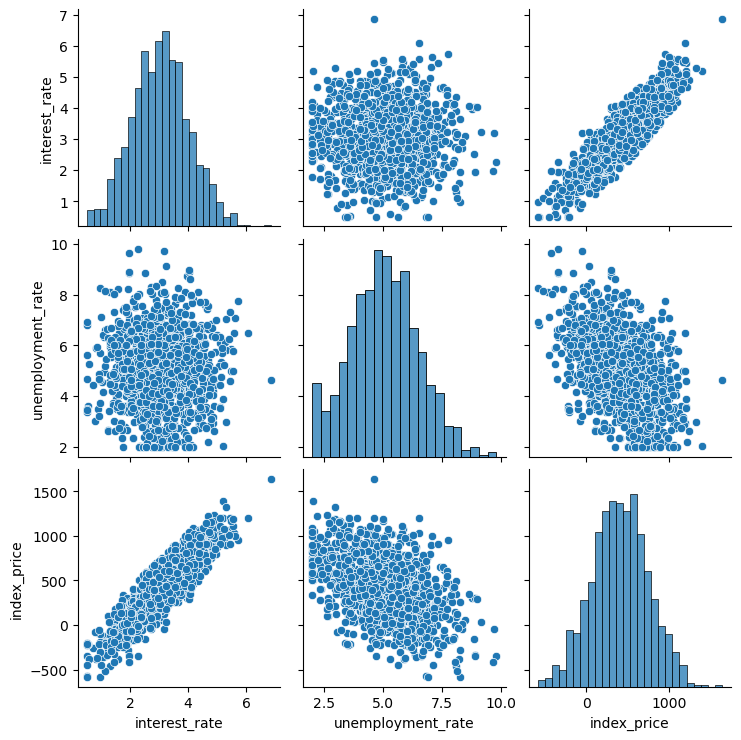

In [7]:
## let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In visualization, There is an inverse relationship between unemployment_rate and index_price. 
Because:

Correlation = −0.441

Negative value = inverse relationship(weak inverse)


In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


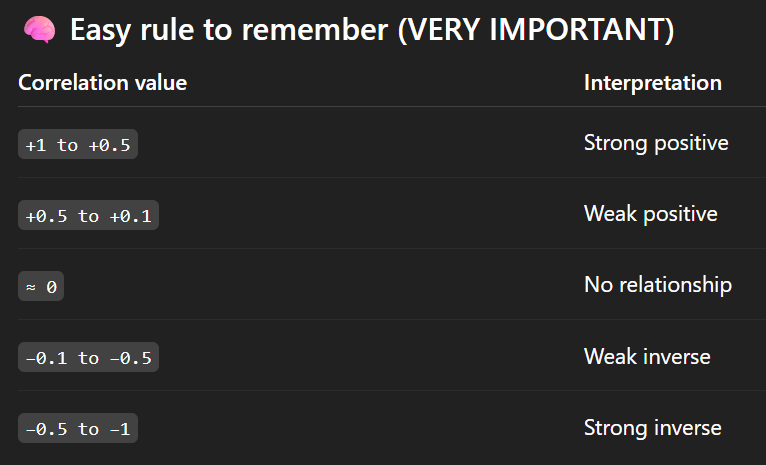

Correlation value	Relationship

−0.1 to 0	Very weak / almost none

−0.1 to −0.5	Weak inverse 

−0.5 to −0.7	Moderate inverse

−0.7 to −1	Strong inverse

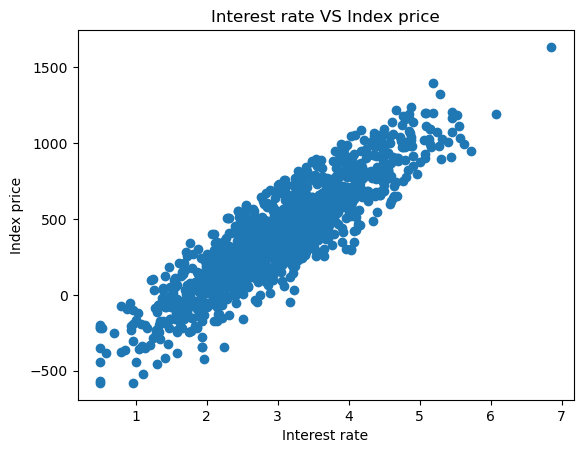

In [9]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['index_price']) #these both are strong positive
plt.xlabel('Interest rate')
plt.ylabel('Index price')
plt.title('Interest rate VS Index price')
plt.show()


#we can see here the slope is going UPWARDS 

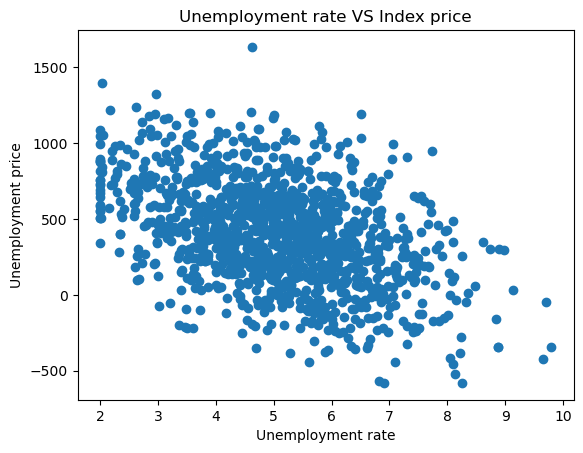

In [10]:
## Visualize the datapoints more closely
plt.scatter(df_index['unemployment_rate'],df_index['index_price']) #these both are weak inverse
plt.xlabel('Unemployment rate')
plt.ylabel('Unemployment price')
plt.title('Unemployment rate VS Index price')
plt.show()

#we can see here the slope is going DOWNWARDS 

now we have done visualization part now we will apply multi linear regression

In [11]:
##independent and dependent features
x=df_index[['interest_rate','unemployment_rate']]

In [12]:
#or another way
X=df_index.iloc[:,:-1] #all the vales and :-1 is for cancelling index_price because it is output feature
y=df_index.iloc[:,-1] #just take the last column and put it in the Y value 

In [13]:
x.head(),y  #this is in the form of tuple

(   interest_rate  unemployment_rate
 0           3.50               5.19
 1           2.86               4.36
 2           3.65               5.18
 3           4.52               5.81
 4           2.77               5.07,
 0       534.714897
 1       424.911412
 2       582.253910
 3       784.797318
 4       321.169866
            ...    
 1195    767.901200
 1196    541.022220
 1197    731.564473
 1198    435.166468
 1199    810.947961
 Name: index_price, Length: 1200, dtype: float64)

In [14]:
x.head()

,interest_rate,unemployment_rate
0,3.50,5.19
1,2.86,4.36
2,3.65,5.18
3,4.52,5.81
4,2.77,5.07


In [15]:
y

0       534.714897
1       424.911412
2       582.253910
3       784.797318
4       321.169866
           ...    
1195    767.901200
1196    541.022220
1197    731.564473
1198    435.166468
1199    810.947961
Name: index_price, Length: 1200, dtype: float64

In [16]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

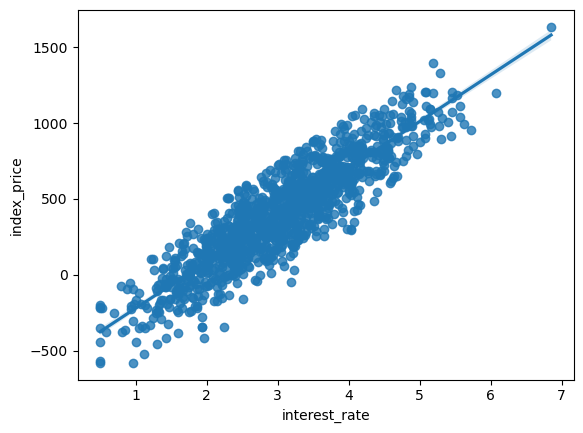

In [18]:
sns.regplot(
    x=df_index['interest_rate'],
    y=df_index['index_price']
)
#using this we get a regression line and this gives us an amazing idea about the errors probably are going to get is quite less 

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

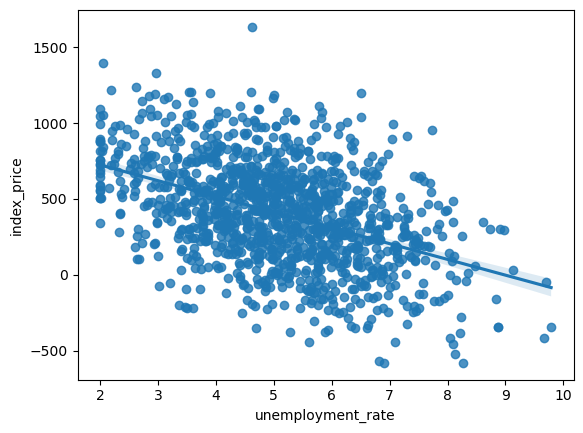

In [19]:
sns.regplot(
    x=df_index['unemployment_rate'],
    y=df_index['index_price']
)
#u

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler() #initialization
X_train=scaler.fit_transform(X_train) #when we do fit_transform,it converts data into 2D array
X_test=scaler.fit_transform(X_test)

'''so now this : X_train=scaler.fit_transform(X_train) 
X_test=scaler.fit_transform(X_test) becomes my input '''

'so now this : X_train=scaler.fit_transform(X_train) \nX_test=scaler.fit_transform(X_test) becomes my input '

In [22]:
X_train

array([[ 0.48555446,  1.1362148 ],
       [ 1.53650812, -1.50284267],
       [-1.14810617, -1.16432483],
       ...,
       [ 0.30866127, -0.32839301],
       [ 0.18379549,  0.8598737 ],
       [ 0.28785031, -1.1574163 ]], shape=(900, 2))

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [24]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


sklearn.model_selection.cross_val_score(estimator(estimator means basically my model okay), X, y=None, *, groups=None, scoring=None (https://scikit-learn.org/stable/modules/model_evaluation.html), cv=None, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', error_score=nan)[source]
Evaluate a score by cross-validation.

In [25]:
##Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, X_train,y_train,scoring='neg_mean_squared_error'
                                ,cv=3)

what is cv=3, so let's say we have 1000 total records and initially we made train test split and then let's say we have 900 on train side and 100 on test side and test data never gonna we use it we will only use train data and test data is only going to be used when we want to test our model with our new data but further to hyperparameter tune my model or to make my model my better we can split train data into train and validation 

In [26]:
validation_score #this would be 3 because we have cv=3

array([-0.59033572, -0.70059044, -0.74756709])

In [27]:
np.mean(validation_score)

np.float64(-0.6794977490893248)

In [28]:
##Prediction
y_pred=regression.predict(X_test)

In [29]:
y_pred

array([ 1.72424289e+02,  3.70257283e+02,  1.07727873e+02,  5.42830232e+02,
        5.95818685e+02,  6.32918843e+02,  1.13810310e+03,  3.94060051e+02,
        3.20496146e+02,  3.57722049e+02,  2.29907757e+02,  7.05000485e+01,
        1.37096732e+02,  2.11992169e+02,  5.61322237e+01,  1.62169120e+02,
        4.51102451e+02,  1.74324556e+02,  6.71218383e+02,  7.71684705e+02,
        1.16145967e+02,  6.70840507e+02,  1.61915068e+02,  3.50695479e+02,
        2.91379418e+02,  1.49002599e+02,  9.19633380e+02,  3.85895369e+02,
        2.37824152e+02,  8.91158823e+01,  3.04607211e+02,  9.05070853e+02,
        1.50013684e+02,  5.33715736e+02,  6.79254117e+02,  3.62471117e+02,
        3.77668135e+02,  3.13791304e+02,  4.65029848e+02,  5.03453211e+02,
       -1.23974120e+02,  4.37236966e+02,  1.25009612e+02,  4.36601830e+01,
        3.47341136e+02,  1.88128770e+02,  4.18624335e+02, -8.35228215e+01,
        4.65849433e+02,  8.45435626e+02,  5.91579643e+02,  5.68662856e+02,
        3.07712625e+02,  

In [30]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)
print(mae)

916.2519053174218
30.269653207749535
24.12717217777219


In [31]:
##r2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-Squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.9922220008164925
0.9921696237176136


## Assumptions 

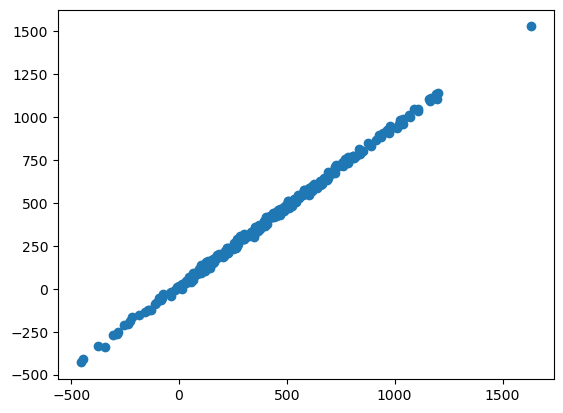

In [32]:
plt.scatter(y_test,y_pred)
#if there is a linear relationship, that means ur model has performed well.

In [33]:
residuals=y_test-y_pred
print(residuals) #these are the errors

1178   -13.175548
865      1.693288
101      3.145250
439      9.289620
58      19.544068
          ...    
772     29.027012
494     50.666430
1027    14.429856
806     17.804515
1141    47.482292
Name: index_price, Length: 300, dtype: float64


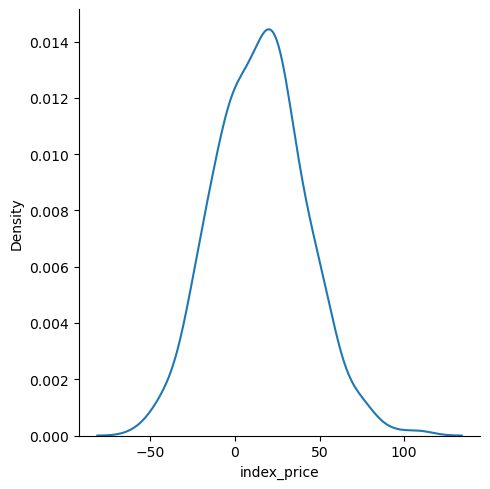

In [34]:
## plot these residuals
sns.displot(residuals,kind='kde') #kde= kernel density estimator

✍️ What you should write / say in exam or viva

The residuals approximately follow a normal distribution with slight skewness, which is acceptable for a real-world dataset. Hence, the linear regression model satisfies the normality assumption.

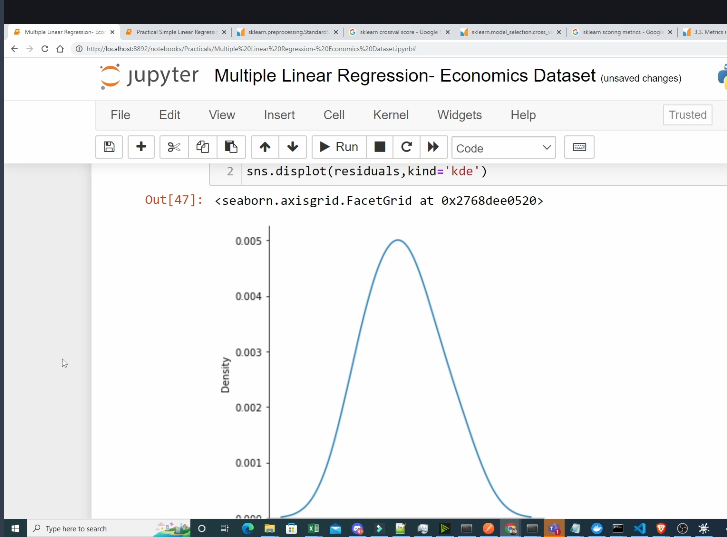if this kind of curve we are getting then the model we have created is good 

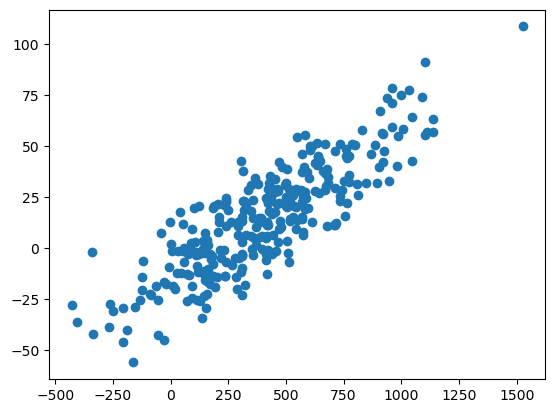

In [35]:
## in assumptions : lets create a scatter plot w.r.t. prediction and residuals
plt.scatter(y_pred,residuals)

 ✍️ Exam / viva-ready explanation (copy this)

The given data is not uniformly distributed because the points show a clear linear trend and clustering around a line. In a uniform distribution, data points are evenly spread across the entire range without any pattern or dependency.

The data is not uniformly distributed; instead, it shows a strong linear relationship with normally distributed noise. This is not a problem, as regression models require structured, dependent data rather than uniformly random data.

Uniform data has no story.

Regression data tells a story.

In [36]:
!pip install statsmodels


  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [39]:
## OLS Linear Regression
import statsmodels.api as sm
print(sm.__version__)


0.14.6


In [40]:
model=sm.OLS(y_train,X_train).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.412
Method:                 Least Squares   F-statistic:                              315.8
Date:                Wed, 17 Dec 2025   Prob (F-statistic):                   1.43e-104
Time:                        13:08:32   Log-Likelihood:                         -6677.3
No. Observations:                 900   AIC:                                  1.336e+04
Df Residuals:                     898   BIC:                                  1.337e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           297.9462     13.469     22.120      0.000     271.511     324.381
x2          -154.5911     13.469    -11.477      0.000    -181.026    -128.156
==============================================================================
Omnibus:                     1170.483   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249288.137
Skew:                           6.662   Prob(JB):                         0.00
Kurtosis:                      83.437   Cond. No.                         1.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

now compare from above coef x1	297.9462 and x2	-154.5911 with upper coef which we get 

In [43]:
print(regression.coef_)

[ 297.94623606 -154.59112155]
